In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import pickle
import json
import os 

In [2]:
with open('/sietch_colab/akapoor/Infer_Demography/MomentsLD/LD_stats/sim_0/best_fit.pkl', 'rb') as f:
    best_fit = pickle.load(f)

In [4]:
best_fit['opt_params']

{'N_bottleneck': 1046.7403451405644,
 'N_recover': 19573.61677889993,
 't_bottleneck_start': 3486.3325671773696,
 't_bottleneck_end': 154.42586757349517,
 'N0': 17865.117115229692}

In [5]:
with open('/sietch_colab/akapoor/Infer_Demography/ld_experiments/bottleneck/simulations/0/sampled_params.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [6]:
sampled_params

{'N0': 15931.20887400734,
 'N_bottleneck': 933.4301570891473,
 'N_recover': 17454.762558404884,
 't_bottleneck_start': 2606.881069748114,
 't_bottleneck_end': 250.68375662023925}

/tmp/ipykernel_4057816/4179025470.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap   = cm.get_cmap("viridis")
/tmp/ipykernel_4057816/4179025470.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.88, 1])


✓ wrote scatter_momentsLD_vs_true.png


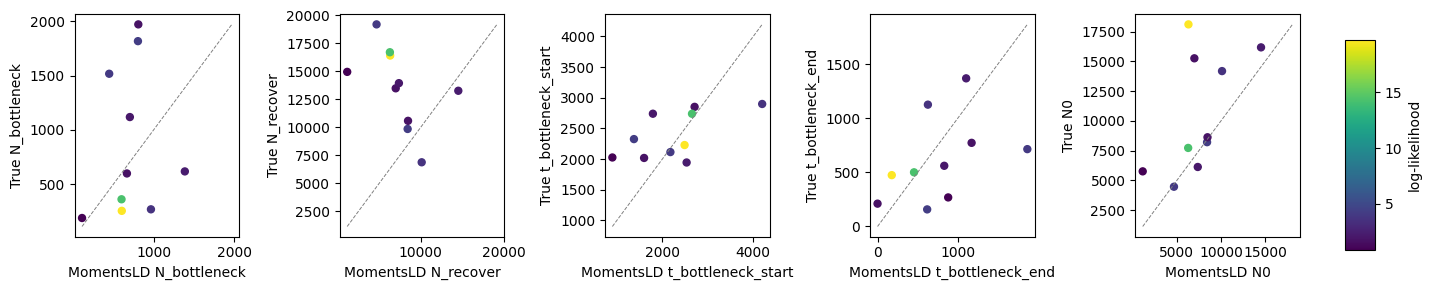

In [20]:
#!/usr/bin/env python3
"""
Gather all simulations and plot Moments-LD estimates vs. true parameters,
colour-coded by log-likelihood.  True values are on the *y-axis*.
"""

from pathlib import Path
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import numpy as np

# ------------------------------------------------------------------------
SIM_BASEDIR = Path(
    "/sietch_colab/akapoor/Infer_Demography/ld_experiments/bottleneck/simulations"
)
LD_ROOT = Path(
    "/sietch_colab/akapoor/Infer_Demography/MomentsLD/LD_stats"
)

PARAM_NAMES = [
    "N_bottleneck",
    "N_recover",
    "t_bottleneck_start",
    "t_bottleneck_end",
    "N0",
]

true_vecs, est_vecs, ll_vec = [], [], []

# ---------------------------------------------------------------- collect ----
for sim_dir in sorted(SIM_BASEDIR.iterdir()):
    sid = sim_dir.name                       # e.g. "0", "7", …
    best_fit_pkl = LD_ROOT / f"sim_{sid}" / "best_fit.pkl"
    if not best_fit_pkl.exists():
        print(f"skip sim {sid}: best_fit.pkl missing")
        continue

    true_vals = pickle.load((sim_dir / "sampled_params.pkl").open("rb"))
    result    = pickle.load(best_fit_pkl.open("rb"))

    true_vecs.append(true_vals)
    est_vecs.append(result["opt_params"])
    ll_vec.append(result["loglik"])

if not true_vecs:
    raise RuntimeError("No simulations found – nothing to plot!")

# ---------------------------------------------------------------- plot -------
norm   = colors.Normalize(vmin=min(ll_vec), vmax=max(ll_vec))
cmap   = cm.get_cmap("viridis")
colour = cmap(norm(ll_vec))

n = len(PARAM_NAMES)
fig, axes = plt.subplots(1, n, figsize=(3 * n, 3), squeeze=False)

for i, p in enumerate(PARAM_NAMES):
    ax = axes[0, i]
    x  = [d[p] for d in est_vecs]     # estimated on x-axis
    y  = [d[p] for d in true_vecs]    # true on y-axis

    ax.scatter(x, y, s=25, c=colour)
    ax.plot([min(x + y), max(x + y)], [min(x + y), max(x + y)],
            ls="--", lw=0.7, color="grey")

    ax.set_xlabel(f"MomentsLD {p}")
    ax.set_ylabel(f"True {p}")

# colour-bar
fig.subplots_adjust(right=0.88)
cax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cax, label="log-likelihood")

fig.tight_layout(rect=[0, 0, 0.88, 1])
fig.savefig("scatter_momentsLD_vs_true.png", dpi=300)
print("✓ wrote scatter_momentsLD_vs_true.png")


In [18]:
for i in np.arange(10):
    with open(f'/sietch_colab/akapoor/Infer_Demography/ld_experiments/bottleneck/simulations/{i}/sampled_params.pkl', 'rb') as f:
        sampled_params = pickle.load(f)
        print(f"Simulation {i} sampled parameters:")
        for key, value in sampled_params.items():
            print(f"{key}: {value}")

Simulation 0 sampled parameters:
N0: 18100.59942928492
N_bottleneck: 252.9487475496224
N_recover: 16417.01412335578
t_bottleneck_start: 2229.4719476247537
t_bottleneck_end: 474.5141100990196
Simulation 1 sampled parameters:
N0: 15253.366348616304
N_bottleneck: 597.480344803044
N_recover: 13488.673407238113
t_bottleneck_start: 2852.2234271014677
t_bottleneck_end: 210.9831622908427
Simulation 2 sampled parameters:
N0: 6134.147836857304
N_bottleneck: 1117.2526103479013
N_recover: 13949.635074110645
t_bottleneck_start: 2740.1477599640248
t_bottleneck_end: 560.9526408459219
Simulation 3 sampled parameters:
N0: 5766.677408198906
N_bottleneck: 186.97186626857408
N_recover: 14958.31302912772
t_bottleneck_start: 2026.7823692692637
t_bottleneck_end: 268.5490454881931
Simulation 4 sampled parameters:
N0: 14181.20464994994
N_bottleneck: 266.9485732885138
N_recover: 6878.352576780438
t_bottleneck_start: 2898.8686321385476
t_bottleneck_end: 1125.948464769022
Simulation 5 sampled parameters:
N0: 4477

In [1]:
import pickle
with open('/sietch_colab/akapoor/Infer_Demography/experiments/bottleneck/inferences/sim_0/dadi/fit_params.pkl', 'rb') as f:
    dadi_fit_params = pickle.load(f)

In [2]:
dadi_fit_params

{'best_params': [array([13235.39645879,  1467.69891925,  3189.65715519,  2456.83856461,
           887.78712107])],
 'best_lls': [-140.18919010680474]}

In [3]:
with open('/sietch_colab/akapoor/Infer_Demography/experiments/bottleneck/simulations/0/sampled_params.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [4]:
sampled_params

{'N0': 13235.39645879176,
 'N_bottleneck': 1467.6989192511476,
 'N_recover': 3541.063247906867,
 't_bottleneck_start': 2180.707729594059,
 't_bottleneck_end': 686.6602336389819}